In [10]:
import pandas as pd
import numpy as np
import random

In [19]:
df = pd.read_csv('adult.csv')
df_zap = df.copy()

In [131]:
df

,age,educational-num,income,income_rand,income_rand_bin,pct
0,25,7,<=50K,41485.08,"(40000.622, 49999.97]",0.631301
1,38,9,<=50K,22375.98,"(20001.926, 30001.274]",0.339237
2,28,12,>50K,96183.51,"(89997.362, 99996.71]",0.982187
3,44,10,>50K,63861.73,"(59999.318, 69998.666]",0.827157
4,18,10,<=50K,46290.18,"(40000.622, 49999.97]",0.704455
...,...,...,...,...,...,...
48837,27,12,<=50K,9428.73,"(-96.763, 10002.578]",0.144241
48838,40,9,>50K,89589.14,"(79998.014, 89997.362]",0.951660
48839,58,9,<=50K,21784.67,"(20001.926, 30001.274]",0.329880
48840,22,9,<=50K,4288.09,"(-96.763, 10002.578]",0.064248


In [25]:
df = df[['age','educational-num','income']]
df['income_rand'] = df['income'].apply(
    lambda x: random.randint(0,5000000)/100 if x == '<=50K' else random.randint(5000000,10000000)/100)
df

C:\Users\v.kovardakov\AppData\Local\Temp\ipykernel_3584\526184600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income_rand'] = df['income'].apply(


,age,educational-num,income,income_rand
0,25,7,<=50K,41485.08
1,38,9,<=50K,22375.98
2,28,12,>50K,96183.51
3,44,10,>50K,63861.73
4,18,10,<=50K,46290.18
...,...,...,...,...
48837,27,12,<=50K,9428.73
48838,40,9,>50K,89589.14
48839,58,9,<=50K,21784.67
48840,22,9,<=50K,4288.09


In [124]:
df.income

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48842, dtype: object

In [126]:
df.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [14]:
df.income_rand.value_counts()

28120.58    3
48352.61    2
45271.68    2
48052.15    2
43906.85    2
           ..
10605.15    1
64298.71    1
49925.63    1
13529.33    1
74764.38    1
Name: income_rand, Length: 48689, dtype: int64

## Смотрим проценты и составляем представление о распределении

In [15]:
df['income'].value_counts(normalize=True)

<=50K    0.760718
>50K     0.239282
Name: income, dtype: float64

In [16]:
df['income_rand'].value_counts(normalize=True)

28120.58    0.000061
48352.61    0.000041
45271.68    0.000041
48052.15    0.000041
43906.85    0.000041
              ...   
10605.15    0.000020
64298.71    0.000020
49925.63    0.000020
13529.33    0.000020
74764.38    0.000020
Name: income_rand, Length: 48689, dtype: float64

## Давайте теперь визуализируем полученный результат

<Axes: >

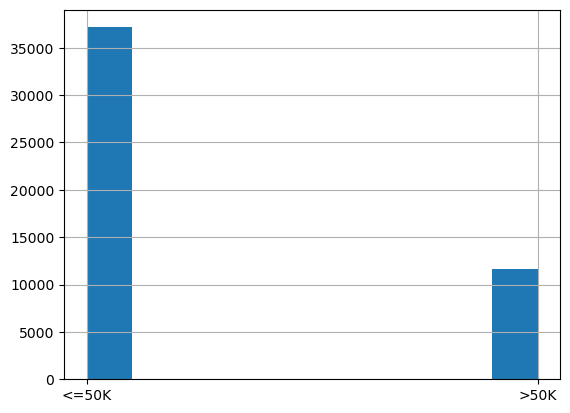

In [17]:
df['income'].hist()

<Axes: >

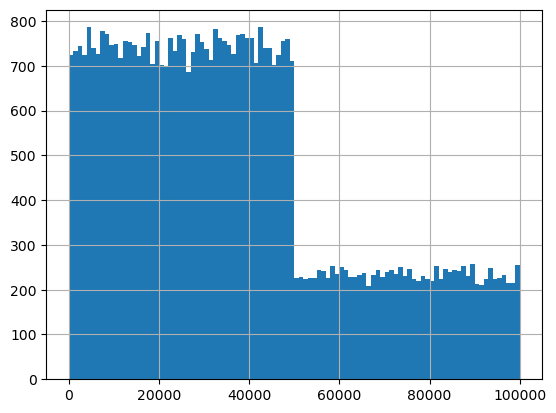

In [128]:
df['income_rand'].hist(bins=100)

<Axes: >

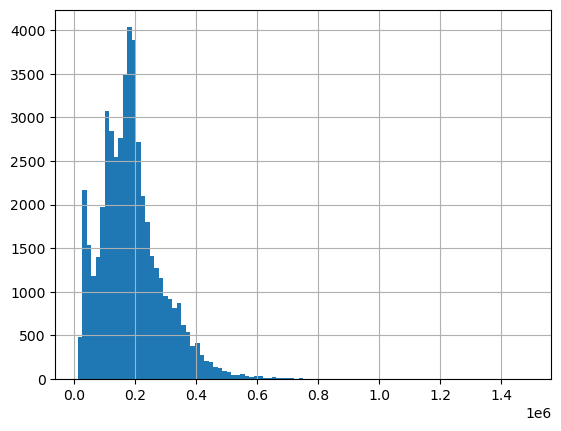

In [22]:
df_zap.fnlwgt.hist(bins = 100)

<Axes: >

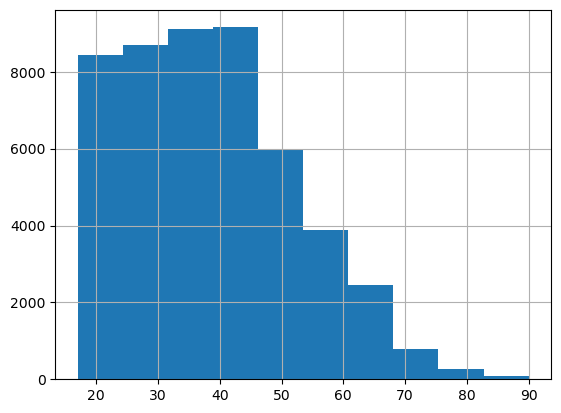

In [31]:
df.age.hist()

## А как получить значения Баров в процентах?

In [130]:
#!pip install seaborn

In [129]:
import seaborn as sns

<Axes: xlabel='age', ylabel='Count'>

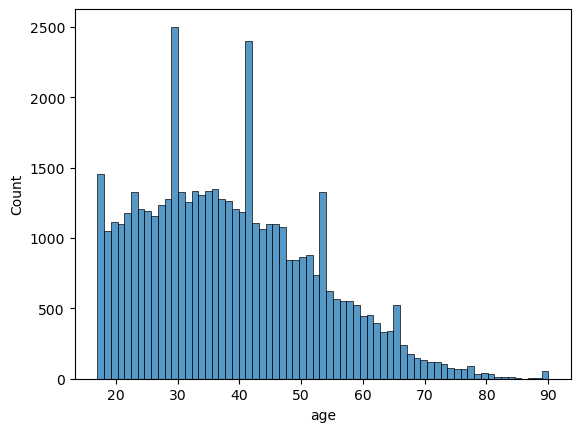

In [32]:
sns.histplot(df['age'])

<Axes: xlabel='age', ylabel='Probability'>

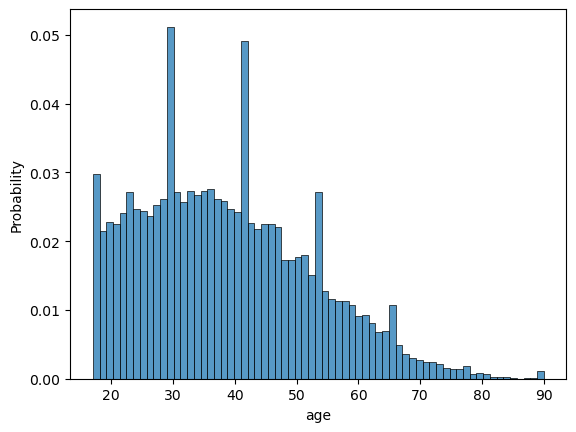

In [33]:
sns.histplot(df['age'],stat='probability')

## Проверка Bins

In [35]:
df

,age,educational-num,income,income_rand,income_rand_bin
0,25,7,<=50K,41485.08,"(40000.622, 49999.97]"
1,38,9,<=50K,22375.98,"(20001.926, 30001.274]"
2,28,12,>50K,96183.51,"(89997.362, 99996.71]"
3,44,10,>50K,63861.73,"(59999.318, 69998.666]"
4,18,10,<=50K,46290.18,"(40000.622, 49999.97]"
...,...,...,...,...,...
48837,27,12,<=50K,9428.73,"(-96.763, 10002.578]"
48838,40,9,>50K,89589.14,"(79998.014, 89997.362]"
48839,58,9,<=50K,21784.67,"(20001.926, 30001.274]"
48840,22,9,<=50K,4288.09,"(-96.763, 10002.578]"


In [37]:
df['income_rand_bin'] = pd.cut(df['income_rand'],10)

C:\Users\v.kovardakov\AppData\Local\Temp\ipykernel_3584\783573082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income_rand_bin'] = pd.cut(df['income_rand'],10)


In [38]:
df.groupby('income_rand_bin')['income_rand'].count()

48842

In [39]:
df.groupby('income_rand_bin')['income_rand'].count()/df.groupby('income_rand_bin')['income_rand'].count().sum()

income_rand_bin
(-96.763, 10002.578]      0.152963
(10002.578, 20001.926]    0.151837
(20001.926, 30001.274]    0.150772
(30001.274, 40000.622]    0.154027
(40000.622, 49999.97]     0.151120
(49999.97, 59999.318]     0.047725
(59999.318, 69998.666]    0.047828
(69998.666, 79998.014]    0.048053
(79998.014, 89997.362]    0.049363
(89997.362, 99996.71]     0.046313
Name: income_rand, dtype: float64

<Axes: xlabel='income_rand', ylabel='Probability'>

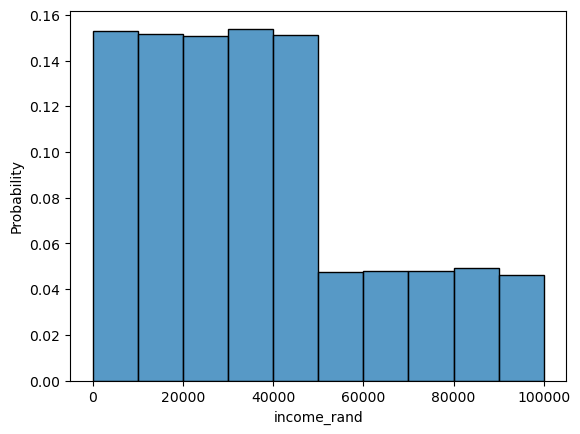

In [40]:
sns.histplot(df['income_rand'],stat='probability', bins = 10)

## Среднее - mean()

In [51]:
l = [1,9,8,7]
print('Сумма ',sum(l))
print('Количество ',len(l))
print('Среднее ',sum(l)/len(l))

Сумма  25
Количество  4
Среднее  6.25


In [41]:
# посчитаем средний возраст
df.age.mean()

38.64358543876172

In [52]:
## Проверим
df.age.sum()/len(df)

38.64358543876172

## Проблема Била Гейтса

In [70]:
df.income_rand.mean()

36955.4113517055

In [71]:
salary = pd.Series([3,3,4,6,5])

In [72]:
salary.mean()

4.2

In [73]:
salary = pd.Series([3,3,4,6,5,1000000])

In [136]:
salary.median()

4.5

## Наблюдаем жирный хвост

<Axes: >

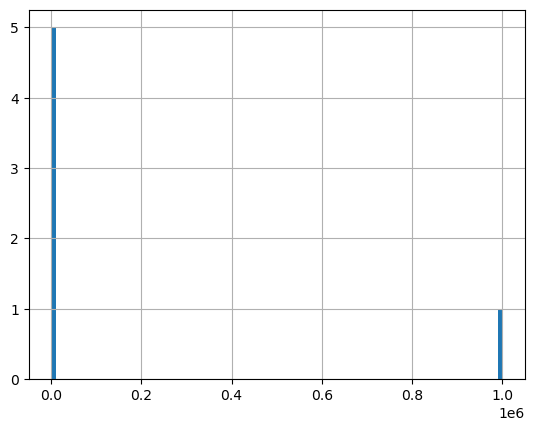

In [135]:
salary.hist(bins = 100)

In [83]:
(df['income_rand'] < df['income_rand'].median()).mean() # Считаем проценты рассказать про mean - 1 и 0

0.5

In [77]:
df.head()

,age,educational-num,income,income_rand,income_rand_bin
0,25,7,<=50K,41485.08,"(40000.622, 49999.97]"
1,38,9,<=50K,22375.98,"(20001.926, 30001.274]"
2,28,12,>50K,96183.51,"(89997.362, 99996.71]"
3,44,10,>50K,63861.73,"(59999.318, 69998.666]"
4,18,10,<=50K,46290.18,"(40000.622, 49999.97]"


## Мода - разрушаем мифы
Самае частое значение (Топ 1)

In [138]:
df.head()

,age,educational-num,income,income_rand,income_rand_bin,pct
0,25,7,<=50K,41485.08,"(40000.622, 49999.97]",0.631301
1,38,9,<=50K,22375.98,"(20001.926, 30001.274]",0.339237
2,28,12,>50K,96183.51,"(89997.362, 99996.71]",0.982187
3,44,10,>50K,63861.73,"(59999.318, 69998.666]",0.827157
4,18,10,<=50K,46290.18,"(40000.622, 49999.97]",0.704455


In [79]:
df['educational-num'].mode()

0    9
Name: educational-num, dtype: int64

In [80]:
df['educational-num'].value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64

In [81]:
# Для непрерывной переменной мода не имеет смысла
df['income_rand'].mode()

0        219.50
1        731.66
2        785.22
3       1108.30
4       1342.57
         ...   
142    87602.52
143    90383.62
144    91724.32
145    92509.90
146    99766.23
Name: income_rand, Length: 147, dtype: float64

In [82]:
df['income_rand'].value_counts()

219.50      2
62921.93    2
32782.60    2
1342.57     2
3553.35     2
           ..
56712.66    1
57860.10    1
94229.96    1
96993.30    1
99017.80    1
Name: income_rand, Length: 48695, dtype: int64

In [84]:
df['income_rand'].agg(['mean','median'])

mean      36955.411352
median    32921.115000
Name: income_rand, dtype: float64

In [ ]:
[1,2,3,4,5,6,7,8,9,10]

<Axes: >

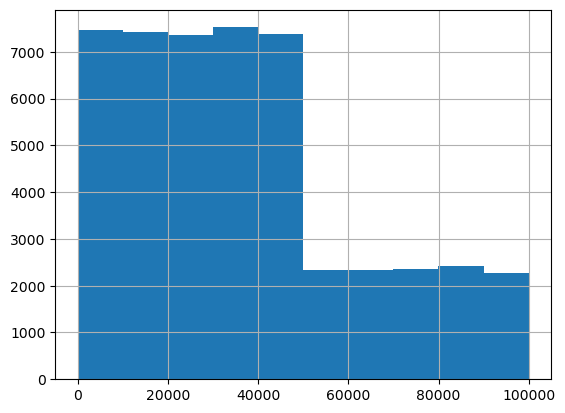

In [85]:
df['income_rand'].hist()

In [140]:
df['income_rand']

0        41485.08
1        22375.98
2        96183.51
3        63861.73
4        46290.18
           ...   
48837     9428.73
48838    89589.14
48839    21784.67
48840     4288.09
48841    99017.80
Name: income_rand, Length: 48842, dtype: float64

In [141]:
(df['income_rand'] < 32921.115000).mean()

0.5

In [144]:
# У скольких процентов участников зарплата меньше 50 000
(df['income_rand'] <= 50000).mean() # У 76% людей зарплата больше 50 000 - Сейчас мы посчиталь квантиль (процентиль/100 он в %)

0.7607182343065395

## Процентиль

In [146]:
df['income_rand'].quantile(0.7607182343065395)

49998.33448507432

In [95]:
(df['income_rand'] < df['income_rand'].quantile(0.76)).mean()

0.7600016379345645

### Есть важные процентили - это Квартили
- 25%
- 50%
- 75%

In [96]:
# Посмотрим на них
print(df['income_rand'].quantile(0.25))
print(df['income_rand'].quantile(0.5))
print(df['income_rand'].quantile(0.75))

16375.225
32921.115
49259.7


### А теперь рассмотрим как сделать на все значения процентили

In [98]:
# Будут значения немного различаться мб в библиотеку заглянуть
df['pct'] = df['income_rand'].rank(pct=True)
df

,age,educational-num,income,income_rand,income_rand_bin,pct
0,25,7,<=50K,41485.08,"(40000.622, 49999.97]",0.631301
1,38,9,<=50K,22375.98,"(20001.926, 30001.274]",0.339237
2,28,12,>50K,96183.51,"(89997.362, 99996.71]",0.982187
3,44,10,>50K,63861.73,"(59999.318, 69998.666]",0.827157
4,18,10,<=50K,46290.18,"(40000.622, 49999.97]",0.704455
...,...,...,...,...,...,...
48837,27,12,<=50K,9428.73,"(-96.763, 10002.578]",0.144241
48838,40,9,>50K,89589.14,"(79998.014, 89997.362]",0.951660
48839,58,9,<=50K,21784.67,"(20001.926, 30001.274]",0.329880
48840,22,9,<=50K,4288.09,"(-96.763, 10002.578]",0.064248


## Boxplot
Подходит для симметричных распределений

<Axes: >

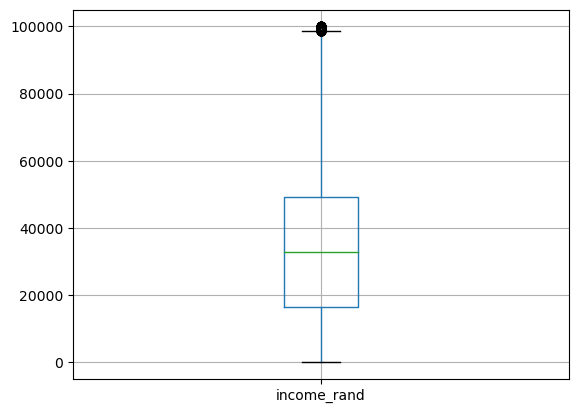

In [100]:

df.boxplot('income_rand') 
# Усы - 1.5 межквартильных размаха - правило трех сигм
# Прямоугольник указывает на квартили
# Черные точки это выбросы - правило трех сигм

<Axes: >

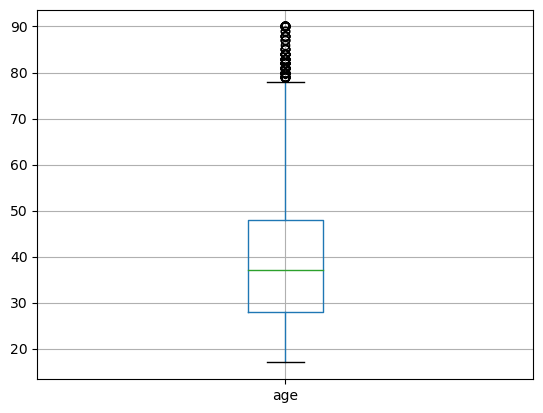

In [102]:
df.boxplot('age') # Здесь выбросы есть, но в нашей интерпретации это может не являться выбросом
# Например киты в геймдеве

<Axes: >

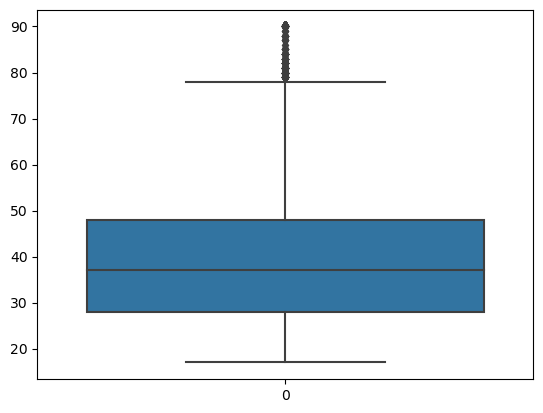

In [105]:
sns.boxplot(df['age'])

<Axes: >

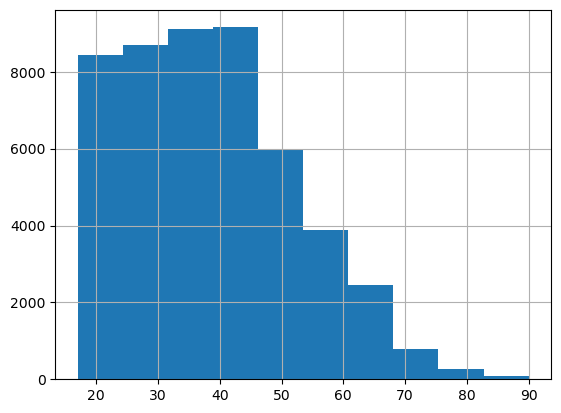

In [106]:
df['age'].hist()

### Поздравляю, мы собрали справку!

In [107]:
df['age'].describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

## Немного хейта

### Дисперсия и среднеквадратичное отклонение

In [114]:
((df['age'] - df['age'].mean())**2).mean() # Дисперсия

187.97423396498843

In [115]:
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.sqrt(((df['age'] - df['age'].mean())**2).mean()) # СТД Среднеквадратичное отклонение

13.71036957798689

In [113]:
np.sqrt(((df['age'] - df['age'].mean())**2).sum() / (len(df)-1))
# (len(df)-1) - степени свободы, поэтому точнее по формуле, просто будем знать.

13.710509934443557

### Вместо среднеквадратичного отклонения, можно смотреть среднее абсолютное отклонение 
- Вместо STD используем MAD

In [117]:
(df['age'] - df['age'].mean()).abs().mean()

11.24369987888416

### Корреляция

Так же стоит помнить, что корреляция работает схожим образом, и она может ввести в заблуждение.\
https://en.wikipedia.org/wiki/Correlation

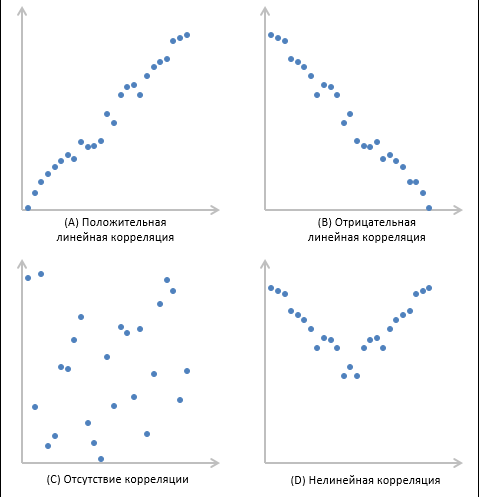

In [118]:
df[['age','income_rand']].corr()

,age,income_rand
age,1.000000,0.192459
income_rand,0.192459,1.000000


In [121]:
df.groupby('income_rand_bin')['age'].agg(['count','mean','median'])

,count,mean,median
income_rand_bin,,,
"(-96.763, 10002.578]",7471,36.876322,34.0
"(10002.578, 20001.926]",7416,36.572816,34.0
"(20001.926, 30001.274]",7364,36.963199,34.0
"(30001.274, 40000.622]",7523,36.839559,34.0
"(40000.622, 49999.97]",7381,37.111232,35.0
"(49999.97, 59999.318]",2331,44.432861,44.0
"(59999.318, 69998.666]",2336,44.239726,43.0
"(69998.666, 79998.014]",2347,44.510013,44.0
"(79998.014, 89997.362]",2411,44.335960,43.0


In [119]:
df

,age,educational-num,income,income_rand,income_rand_bin,pct
0,25,7,<=50K,41485.08,"(40000.622, 49999.97]",0.631301
1,38,9,<=50K,22375.98,"(20001.926, 30001.274]",0.339237
2,28,12,>50K,96183.51,"(89997.362, 99996.71]",0.982187
3,44,10,>50K,63861.73,"(59999.318, 69998.666]",0.827157
4,18,10,<=50K,46290.18,"(40000.622, 49999.97]",0.704455
...,...,...,...,...,...,...
48837,27,12,<=50K,9428.73,"(-96.763, 10002.578]",0.144241
48838,40,9,>50K,89589.14,"(79998.014, 89997.362]",0.951660
48839,58,9,<=50K,21784.67,"(20001.926, 30001.274]",0.329880
48840,22,9,<=50K,4288.09,"(-96.763, 10002.578]",0.064248


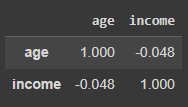

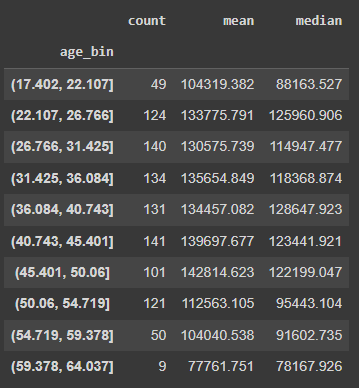

<Axes: xlabel='age', ylabel='income_rand'>

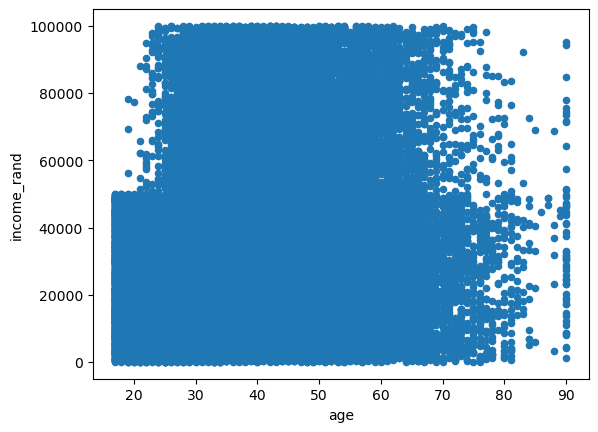

In [122]:
df.plot(x='age',y='income_rand',kind='scatter')

## Подведем итоги

<Axes: title={'center': 'income_rand'}, xlabel='age'>

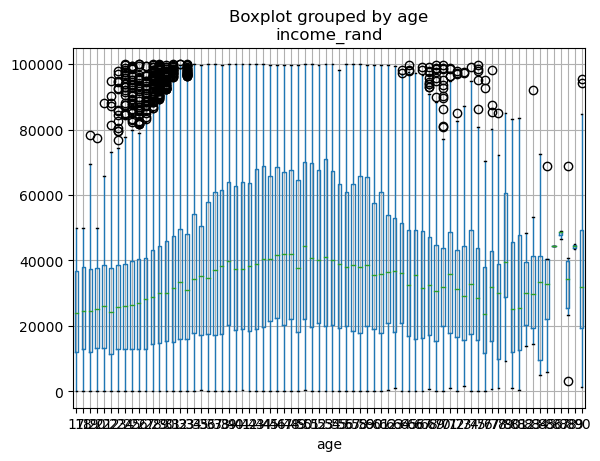

In [123]:
df.boxplot('income_rand',by='age')

## Д/З посмотреть violin plot